In [ ]:
from keras.datasets import mnist

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [ ]:
import random

In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

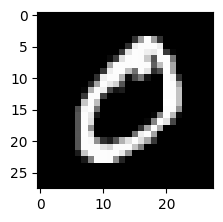

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[1,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

In [ ]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [ ]:
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))

In [ ]:
model.add(Flatten())

In [ ]:
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 16ms/step - loss: 2.3094 - accuracy: 0.0909


[2.3094382286071777, 0.0908999964594841]

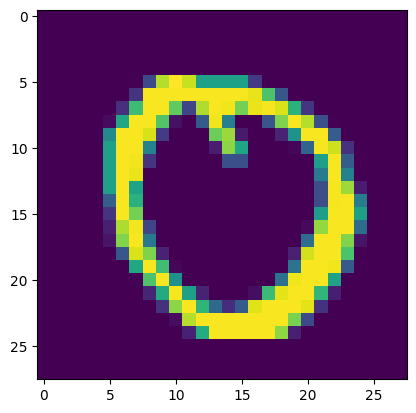

In [ ]:
idx2 = random.randint(3, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [ ]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 33ms/step


array([[0.09338567, 0.09992869, 0.09898352, 0.09551662, 0.10781906,
        0.09784345, 0.10764178, 0.09334409, 0.09673437, 0.1088027 ],
       [0.11431689, 0.098794  , 0.09841489, 0.09275314, 0.09852207,
        0.09015235, 0.10552055, 0.10363773, 0.09199903, 0.10588936],
       [0.10280952, 0.10377868, 0.10096204, 0.09436279, 0.09571113,
        0.09990149, 0.10286777, 0.09824672, 0.10020917, 0.1011507 ],
       [0.09876586, 0.10802472, 0.09894994, 0.09559228, 0.10579578,
        0.10418987, 0.10510701, 0.09220629, 0.08246485, 0.10890343],
       [0.09581815, 0.10509951, 0.10263258, 0.09617535, 0.09970573,
        0.09714454, 0.09981258, 0.10191759, 0.10084107, 0.10085284]],
      dtype=float32)